In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import seaborn, matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Basic EDA

From here we shall be performing basic EDA to understanding the dataset first. The objective of the projects is to predition for credit card fraud.


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# make read excel files
df = pd.read_csv("/content/drive/MyDrive/IIT/Academics/Year 02/Semester 01/CM2603 Data Science Group Project/Group 02/Data Set/creditcard_2023.csv")
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [26]:
# Each transaction is labeled as either fraudulent (1) or non-fraudulent (0)
df["Class"].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [11]:
# use .info() to get the shape, number of records and data types of each features and target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [12]:
# drop id column
df.drop(['id'], axis=1, inplace=True) # drop id

<Axes: title={'center': 'Histogram of Amount'}, xlabel='Amount', ylabel='Count'>

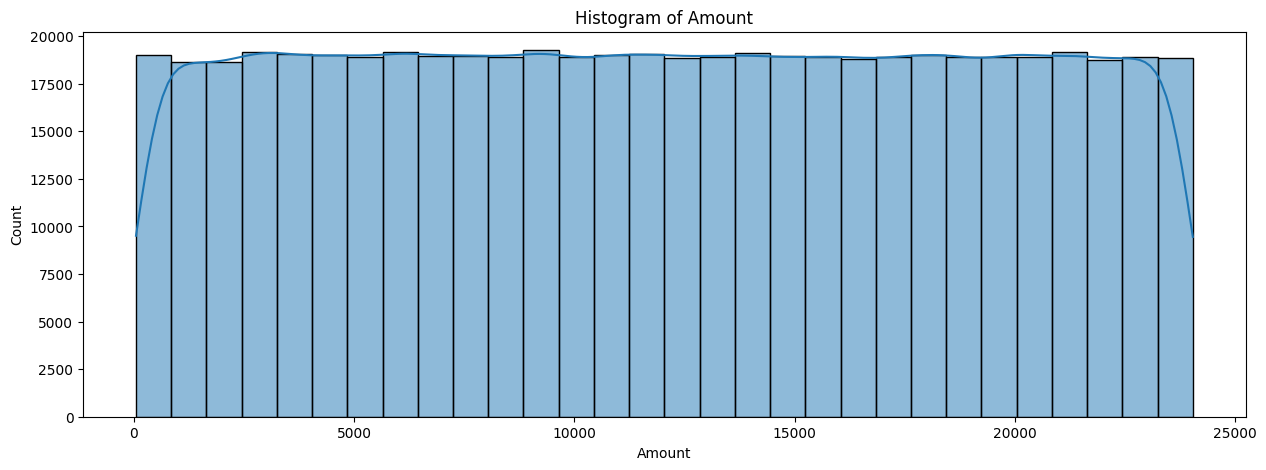

In [13]:
# histplot for Amount
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title("Histogram of Amount")
sns.histplot(df["Amount"], bins=30, kde=True, ax=ax)

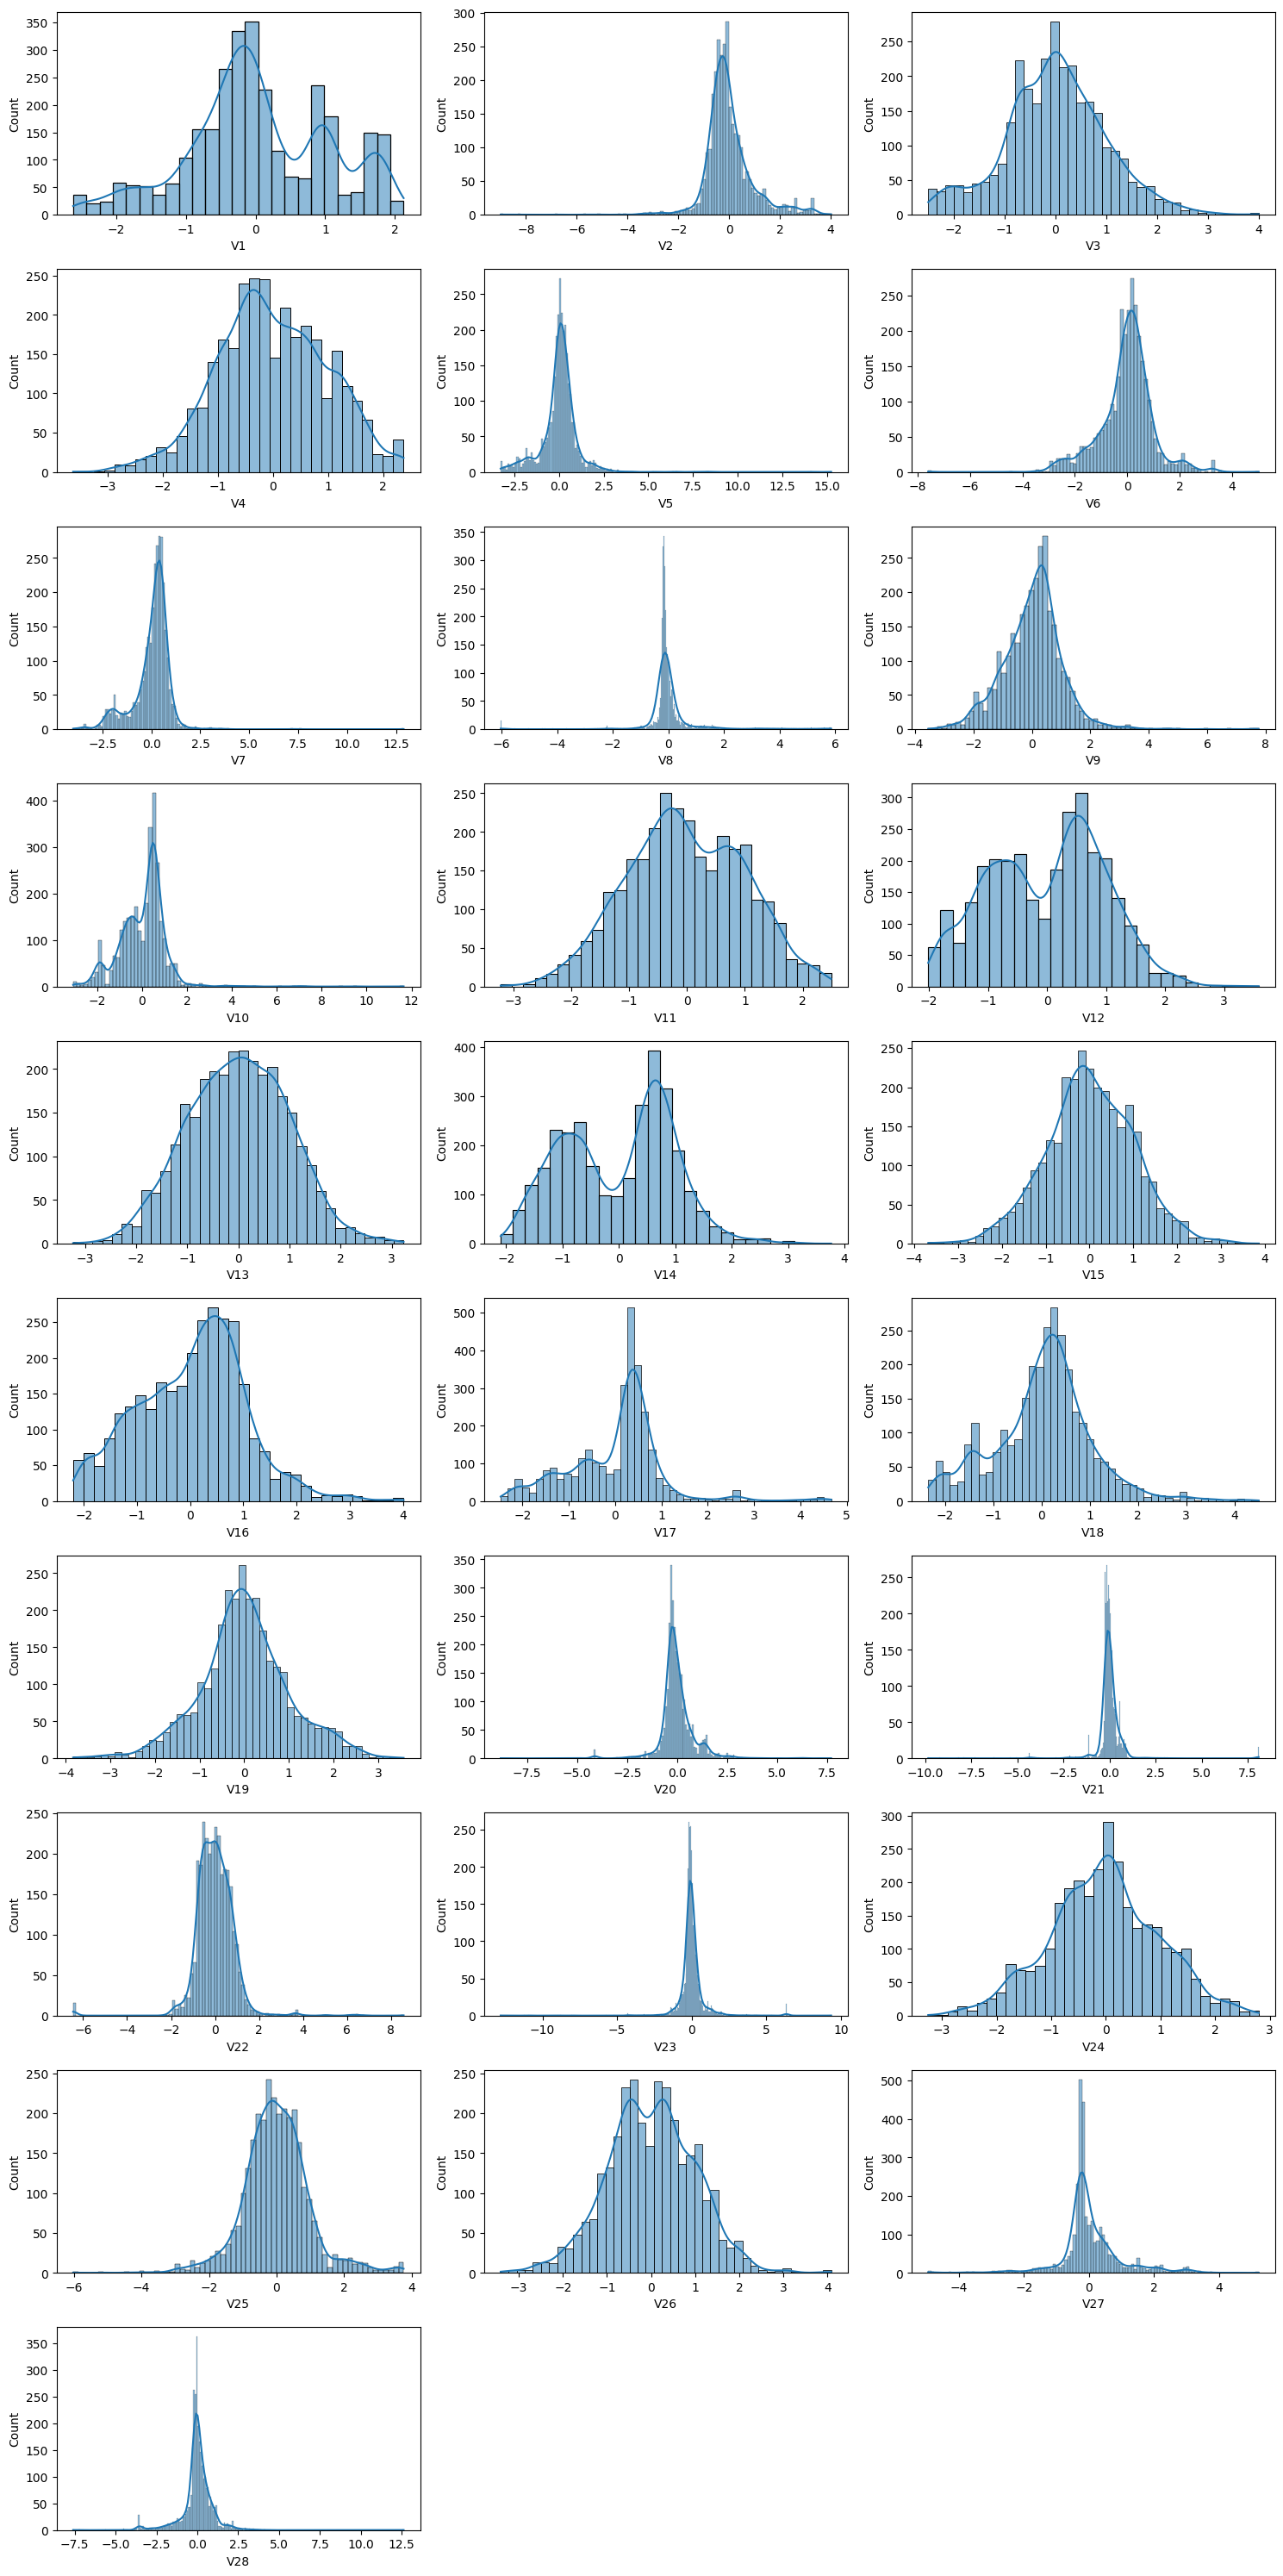

In [14]:
# histplot on features
fig, axs = plt.subplots(nrows = 10, ncols = 3, figsize = (15, 30))
axs = axs.flat

df_temp = df.sample(3000)

for i in range(len(df.columns) -1):
    sns.histplot(
        df_temp[df.columns[i]],
        ax=axs[i],
        kde = True,
    )

fig.delaxes(axs[28])
fig.delaxes(axs[29])
fig.tight_layout()

# Train, Test and Split

In [15]:
# import sklearn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression

In [16]:
# log transform the Amount
df["Amount"] = df["Amount"].map(lambda x: np.log(x))

In [17]:
# copy df to data variable
data = df.copy()

In [18]:
# Let do a train, test split and we shall perform some preparation on the training data for model
from sklearn.model_selection import train_test_split

X = data.drop(["Class"], axis=1) # drop "Class" column
y = data["Class"]

# Split the data into train and test data using the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=12345)

# Build Pipeline and Model

In [19]:
# Get indices of X_train
num_col_index = X_train.select_dtypes(include="number").columns
num_indices = [X_train.columns.get_loc(val) for val in num_col_index]
print(num_indices)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


In [20]:
# Setup the transformer for scaling,
# Be sure to use the column indices instead of column names here!
scaling_transformer_num = make_column_transformer(
    (StandardScaler(),  num_indices),
    remainder = "passthrough"
)

In [21]:
# Setup the preprocessing pipeline
full_transformer = make_pipeline(
    scaling_transformer_num,
)

my_pipeline = make_pipeline(
      full_transformer,
      LogisticRegression(),
)

In [22]:
# fit X_train
full_transformer.fit(X_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28])]))])

In [23]:
# Function to derive the classification_report for a model passed as an argument
# Make sure to include the transformer steps!

def get_prediction_scores(X_train, X_test, y_train, y_test, model=LogisticRegression()): # you can change the model

    #Setup a pipeline with the (regression) model
    meta_pipeline = make_pipeline(
        full_transformer,
        model,
    )

    meta_pipeline.fit(X_train, y_train)

    y_pred_train_pipe = meta_pipeline.predict(X_train)
    y_pred_test_pipe = meta_pipeline.predict(X_test)

    print("Classification Report (TRAIN)"),
    print(classification_report(y_train, y_pred_train_pipe)),
    print(),
    print("Classification Report (TEST)"),
    print(classification_report(y_test, y_pred_test_pipe))

In [24]:
# Check if the function works
get_prediction_scores(X_train, X_test, y_train, y_test)

Classification Report (TRAIN)
              precision    recall  f1-score   support

           0       0.95      0.98      0.97    198953
           1       0.98      0.95      0.96    199088

    accuracy                           0.96    398041
   macro avg       0.97      0.96      0.96    398041
weighted avg       0.97      0.96      0.96    398041


Classification Report (TEST)
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     85362
           1       0.98      0.95      0.96     85227

    accuracy                           0.96    170589
   macro avg       0.97      0.96      0.96    170589
weighted avg       0.97      0.96      0.96    170589

